# 1930~2014年世界杯数据分析
- 数据来源: kaggle网站
- 分析说明: 世界杯作为全世界最盛大的单项体育赛事,有着巨大的经济、政治效应。本文只收录分析1930~2014年共20届世界杯(1942年和1946年因二战停办)的数据，不包含最新一届（俄罗斯世界杯）的数据
- 分析目的：对历届世界杯做个汇总分析，探索哪支国家队夺冠次数最多、探索每届世界杯的进球总数、参赛队伍数、现场出席总人数、亚季军的获得情况、主客队对战情况等。

![这是一幅图片](2018world.jpg)

## 数据概述

In [1]:
#需要打印所有变量（而不只是最后一个）
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
matches = pd.read_csv("data/WorldCupMatches.csv",encoding='gbk')
cups = pd.read_csv("data/WorldCups.csv",encoding='gbk')
matches.head()
cups.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


** 只分析两个表:matches（比赛详细记录表）、cups（汇总记录表）的数据**
***
** matches表的特征含义: **
- Year: 年份
- Datetime: 比赛时间(当地时间)
- Stage: 比赛阶段(小组赛,淘汰赛)
- Stadium: 比赛场馆名
- City: 比赛城市
- Home Team Name: 主队名称(对阵双方,写在左侧的即为主队)
- Home Team Goals: 主队进球数
- Away Team Name: 客队名称(对阵双方,写在右侧的即为客队)
- Away Team Goals: 客队进球数
- Win conditions: 赢得条件(特殊条件,如点球、加时赛中获胜)
- Attendance; 现场的总出席人数,即现场观众人数
- Half time Home Goals: 上半场的主队进球数
- Half time Away Goals: 上半场的客队进球数
- Referee: 主裁判的名字
- Assistant: 边裁(2个)的名字
- RoundID: 比赛的回合编号
- MatchID: 比赛编号
- Home/Away Team Initials: 主/客队国家的前三个字母缩写
****
** cups表的特征含义: **
- Country: 举办国家
- Winner: 冠军
- Runner-Up: 亚军
- Third: 季军
- Fourth: 第四名
- GoalsScored: 进球总数
- QualifiedTeams: 参赛队伍总数
- MatchesPlayed: 比赛的总场数
- Attendance: 总出席(观众)人数

## 数据预处理
### 清洗数据
#### 检测与处理重复值

In [3]:
# 对matches表、cups表进行记录去重
matches.drop_duplicates(inplace=True)
cups.drop_duplicates(inplace=True)
# 对matches表进行列去重
'''由于matches表的Home/Away Team Initials与Home/Away Team Name所代表的含义完全相同,因此直接删除Home/Away Team Initials两列'''
matches.drop(labels="Home Team Initials",axis=1,inplace=True)
matches.drop(labels="Away Team Initials",axis=1,inplace=True)

'由于matches表的Home/Away Team Initials与Home/Away Team Name所代表的含义完全相同,因此直接删除Home/Away Team Initials两列'

#### 检测与处理缺失值

In [4]:
# 去重后检测matches表的缺失值
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 18 columns):
Year                    836 non-null int64
Datetime                836 non-null object
Stage                   836 non-null object
Stadium                 836 non-null object
City                    836 non-null object
Home Team Name          836 non-null object
Home Team Goals         836 non-null int64
Away Team Goals         836 non-null int64
Away Team Name          836 non-null object
Win conditions          836 non-null object
Attendance              835 non-null float64
Half-time Home Goals    836 non-null int64
Half-time Away Goals    836 non-null int64
Referee                 836 non-null object
Assistant 1             836 non-null object
Assistant 2             836 non-null object
RoundID                 836 non-null int64
MatchID                 836 non-null int64
dtypes: float64(1), int64(7), object(10)
memory usage: 124.1+ KB


从matches表可以发现去重后:
- 总场数(记录数): 836
- 特征总数: 18
- 缺失: 现在总出席人数,缺失数目为1

In [5]:
# 处理matches表的Attendance列的缺失值
# 找出缺失的行
a = matches.loc[matches['Attendance'].isnull()]
a

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID
823,2014,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2,1,Algeria,Germany win after extra time,NaN,0,0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951,300186460


可以发现:缺失的是2014年德国VS阿尔及利亚的现场出席人数,因此采用2014年总出席人数的均值填充

In [6]:
avgAtt_2014 = round(matches.Attendance[matches.Year==2014].mean(),1)
matches.fillna(avgAtt_2014,inplace=True)
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 18 columns):
Year                    836 non-null int64
Datetime                836 non-null object
Stage                   836 non-null object
Stadium                 836 non-null object
City                    836 non-null object
Home Team Name          836 non-null object
Home Team Goals         836 non-null int64
Away Team Goals         836 non-null int64
Away Team Name          836 non-null object
Win conditions          836 non-null object
Attendance              836 non-null float64
Half-time Home Goals    836 non-null int64
Half-time Away Goals    836 non-null int64
Referee                 836 non-null object
Assistant 1             836 non-null object
Assistant 2             836 non-null object
RoundID                 836 non-null int64
MatchID                 836 non-null int64
dtypes: float64(1), int64(7), object(10)
memory usage: 124.1+ KB


处理后可以看出，所有特征都已经没有缺失值了。

In [7]:
# 去重后检测cups表的缺失值
cups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null int64
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


从cups表可以发现:
- 总届数(记录数): 20
- 特征总数: 10
- 缺失值: 无，数据完整不需要进一步处理数据

In [8]:
# 查看数据的基本统计值
matches.describe()
cups.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,8.360000e+02,8.360000e+02
mean,1984.535885,1.824163,1.021531,44870.102751,0.718900,0.427033,1.086093e+07,5.677577e+07
std,22.299860,1.619178,1.072024,23539.013633,0.941995,0.675091,2.751802e+07,1.070329e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,29800.000000,0.000000,0.000000,2.620000e+02,1.183500e+03
50%,1990.000000,2.000000,1.000000,41061.500000,0.000000,0.000000,3.370000e+02,2.113500e+03
75%,2002.000000,3.000000,2.000000,60984.500000,1.000000,1.000000,2.497220e+05,4.395005e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,1974.800000,118.950000,21.250000,41.800000,1.872882e+06
std,25.582889,32.972836,7.268352,17.218717,1.071842e+06
min,1930.000000,70.000000,13.000000,17.000000,3.630000e+05
25%,1957.000000,89.000000,16.000000,30.500000,8.748315e+05
50%,1976.000000,120.500000,16.000000,38.000000,1.734864e+06
75%,1995.000000,145.250000,26.000000,55.000000,2.725173e+06
max,2014.000000,171.000000,32.000000,64.000000,3.587538e+06


可以发现:
- 主队场均进球数为: 1.8个,多于客队的1.0个 。
- 主队半场场均进球数为： 0.7个，同样多于客队的0.4个。
- 场均出席人数是: 44870.1人。
- 平均比赛场数为： 41.8场

## 数据的初步分析：
### 先从cups表的Winner、Runners-Up、Third、Fourth列分析哪支队伍夺冠最多,谁是"千年老二"等（条形图）

In [9]:
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
cups['Year1'] = cups['Year'].astype(str)
c1  = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index() # 按Winner分组，并按‘Year1’显示
c2  = cups.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending = False)
c1
c2
c12

,Winner,Year1
0,Argentina,"1978 , 1986"
1,Brazil,"1958 , 1962 , 1970 , 1994 , 2002"
2,England,1966
3,France,1998
4,Germany,2014
5,Germany FR,"1954 , 1974 , 1990"
6,Italy,"1934 , 1938 , 1982 , 2006"
7,Spain,2010
8,Uruguay,"1930 , 1950"


,Winner,Year
0,Argentina,2
1,Brazil,5
2,England,1
3,France,1
4,Germany,1
5,Germany FR,3
6,Italy,4
7,Spain,1
8,Uruguay,2


,Winner,Year1,Year
1,Brazil,"1958 , 1962 , 1970 , 1994 , 2002",5
6,Italy,"1934 , 1938 , 1982 , 2006",4
5,Germany FR,"1954 , 1974 , 1990",3
0,Argentina,"1978 , 1986",2
8,Uruguay,"1930 , 1950",2
2,England,1966,1
3,France,1998,1
4,Germany,2014,1
7,Spain,2010,1


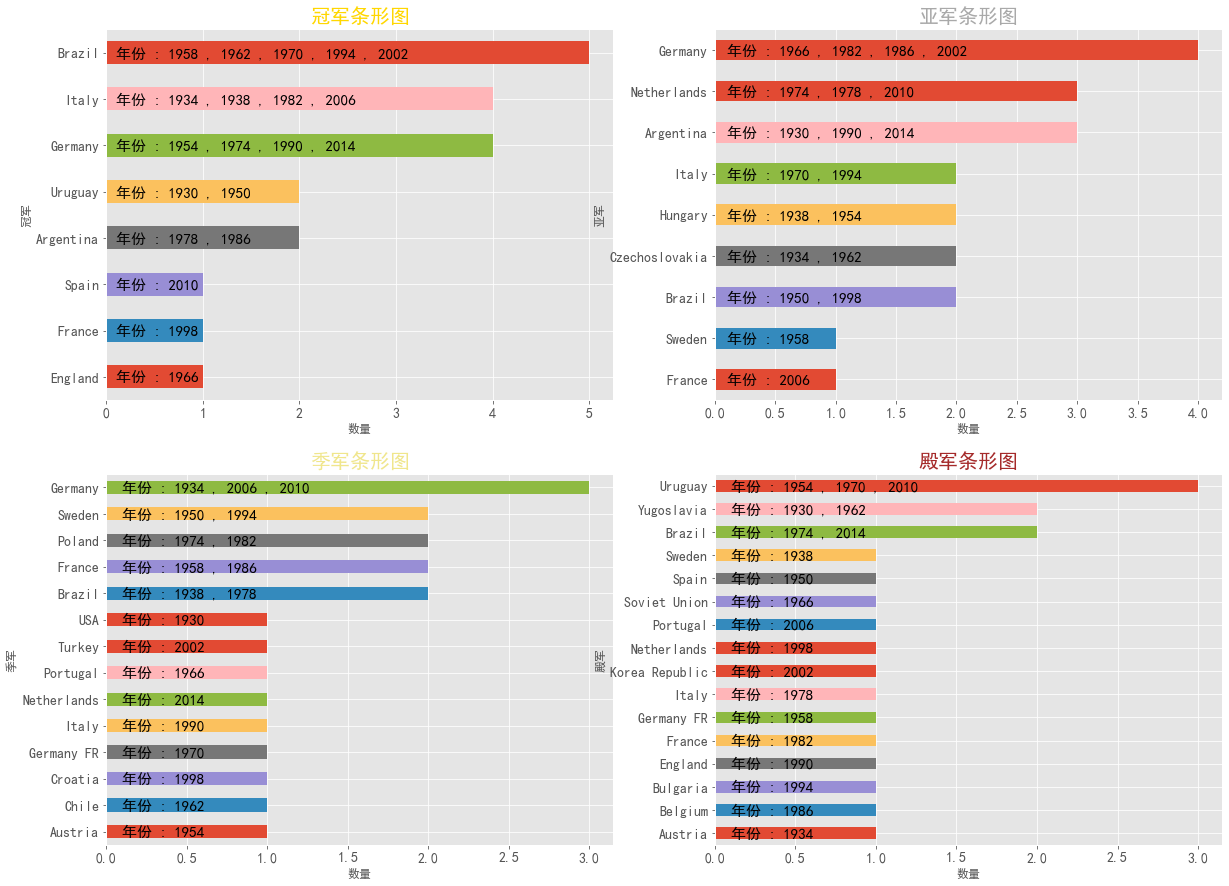

In [12]:
# 引入需要的库
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
def wc2018():
    ## 设置中文显示
    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False
    cups["Winner"]=cups["Winner"].replace("Germany FR","Germany"); #1990年两德统一,因此把联邦德国数据数据统一纳入为德国的数据
    cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany");
    fig = plt.figure(figsize=(20,15))

    # 冠军图一
    plt.subplot2grid((2,2),(0,0))
    # 按数量降序显示
    c1 = cups.groupby("Winner")["Year"].count().sort_values(ascending=True);# sort_values（）排序输出，类似MYSQL的order by
    c1.plot.barh(grid=True,fontsize=14)
    plt.title("冠军条形图",fontsize=20,color='gold')
    plt.xlabel("数量");
    plt.ylabel("冠军");
    # 设置冠军条形图的数据标签
    cups['Year1'] = cups['Year'].astype(str)
    c1  = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
    c2  = cups.groupby("Winner")['Year'].count().reset_index();
    c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
    c12 = c12.sort_values(by = "Year",ascending = True)
    for i,j in enumerate("年份 : " + c12["Year1"]):  #对于一个可迭代的（iterable）/可遍历的对象（如列表、字符串），enumerate将其组成一个索引序列，利用它可以同时获得索引和值多用于在for循环中得到计数返回的是一个enumerate对象
        plt.text(.1,i,j,ha='left',va='center',fontsize=15)

    # 亚军图二
    plt.subplot2grid((2,2),(0,1))
    c2 = cups.groupby("Runners-Up")["Year"].count().sort_values(ascending=True)# sort_values（）排序输出，类似MYSQL的order by
    c2.plot.barh(grid=True,fontsize=14)
    plt.title("亚军条形图",fontsize=20,color='darkgrey')
    plt.xlabel("数量")
    plt.ylabel("亚军")
    # 设置亚军条形图的数据标签
    c1  = cups.groupby("Runners-Up")["Year1"].apply(" , ".join).reset_index()
    c2  = cups.groupby("Runners-Up")['Year'].count().reset_index()
    c12 = c1.merge(c2,left_on="Runners-Up",right_on="Runners-Up",how="left")
    c12 = c12.sort_values(by = "Year",ascending = True)
    for i,j in enumerate("年份 : " + c12["Year1"]):
        plt.text(.1,i,j,ha='left',va='center',fontsize=15)

    # 季军图三
    plt.subplot2grid((2,2),(1,0))
    c3 = cups.groupby("Third")["Year"].count().sort_values(ascending=True)
    c3.plot.barh(grid=True,fontsize=14)
    plt.title("季军条形图",fontsize=20,color='khaki')
    plt.xlabel("数量")
    plt.ylabel("季军")
    # 设置季军条形图的数据标签
    c1  = cups.groupby("Third")["Year1"].apply(" , ".join).reset_index()
    c2  = cups.groupby("Third")['Year'].count().reset_index()
    c12 = c1.merge(c2,left_on="Third",right_on="Third",how="left")
    c12 = c12.sort_values(by = "Year",ascending = True)
    for i,j in enumerate("年份 : " + c12["Year1"]):
        plt.text(.1,i,j,ha='left',va='center',fontsize=15)

    #殿军图四
    plt.subplot2grid((2,2),(1,1))
    c4 = cups.groupby("Fourth")["Year"].count().sort_values(ascending=True)
    c4.plot.barh(grid=True,fontsize=14)
    plt.title("殿军条形图",fontsize=20,color='brown')
    plt.xlabel("数量")
    plt.ylabel("殿军")
    # 设置殿军条形图的数据标签
    c1  = cups.groupby("Fourth")["Year1"].apply(" , ".join).reset_index()
    c2  = cups.groupby("Fourth")['Year'].count().reset_index()
    c12 = c1.merge(c2,left_on="Fourth",right_on="Fourth",how="left")
    c12 = c12.sort_values(by = "Year",ascending = True)
    for i,j in enumerate("年份 : " + c12["Year1"]):
        plt.text(.1,i,j,ha='left',va='center',fontsize=15)

    plt.style.use("ggplot") # 执行两次才有效果
    return plt.show()
wc2018()

从上面四幅图,可以发现:
- 巴西队夺冠次数最多,共5次，且在1958~1962届完成卫冕的壮举，意大利和德国(统一)紧跟其后，共4次，而意大利在第一二两届是卫冕亚军。
- 亚军方面,荷兰并不是名副其实的"千年老二",德国(统一)才是，且德国在1982~1986两届是卫冕亚军阿根廷和荷兰亚军数同样多，为3次。
- 季军方面，同样是德国以3次高居榜首，其次是瑞典、波兰、法国、巴西并列第二位，都是2次。
- 殿军方面，最多次数是3次的乌拉圭，其次是解体前的南斯拉夫。
- 无论是冠亚季军，都出现在榜首的有：巴西、德国、意大利，说明这三个国家的足球运动底蕴非常厚，实力强大，是夺冠的热门球队，“桑巴”巴西是名副其实的足球王国。
- 还可以发现，进入冠亚季军榜单的全部是来自欧洲和南美洲的球队，韩国在2002年夺得一次殿军创造亚洲的历史,证明欧洲和南美洲国家的足球队实力比亚非等大洲要强大得多。

### 接着看cups表每届的总进球数、参赛队伍数分布（条形折线组合图+箱型图）

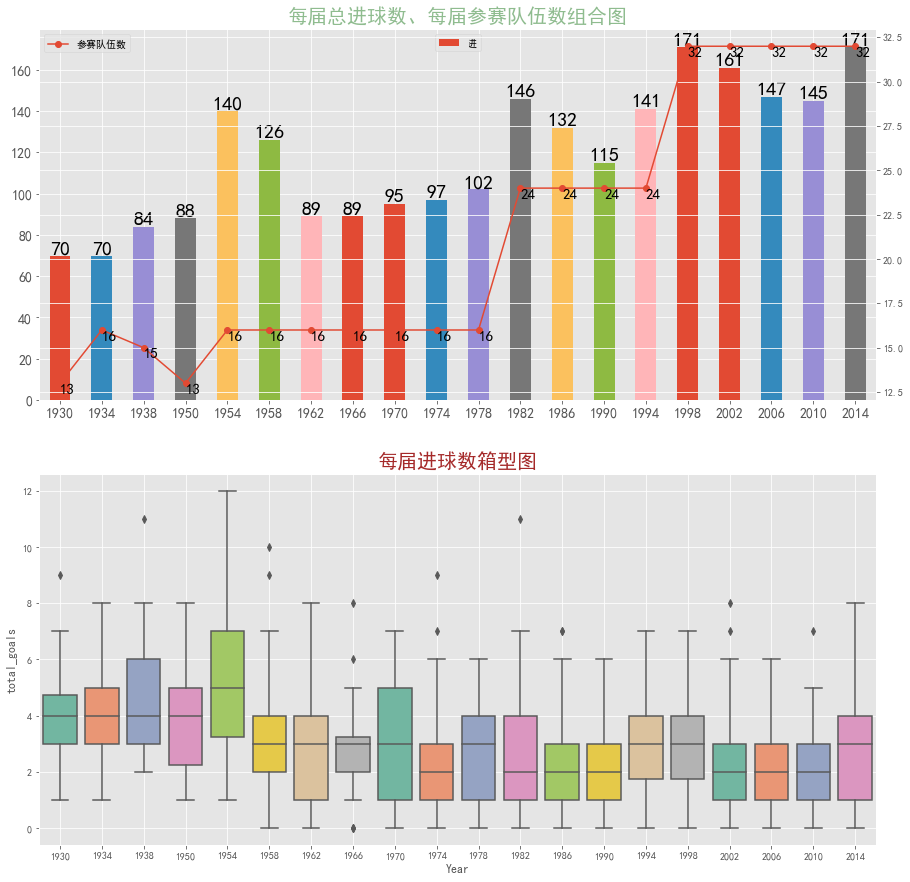

In [13]:
def tballs():
    fig = plt.figure(figsize=(15,15))
    # 总进球数条形图
    ax1 = fig.add_subplot(211)
    x = np.arange(len(cups.Year))
    y1 = cups.GoalsScored
    y1.plot.bar(grid=True,fontsize=14)
    plt.xticks(x,cups.Year,rotation=0)
    plt.legend('进球数',loc="upper center")
    # 添加条形图数据标签
    for a,b in zip(x,y1):
        plt.text(a,b,'%s'%b,ha='center',va='bottom',fontsize=20)
    # 参赛队伍数折线图
    ax2 = ax1.twinx()
    y2 = cups.QualifiedTeams
    plt.plot(x,y2,marker="o",label='参赛队伍数')
    plt.legend(loc='upper left')
    # 添加折线图数据标签
    for a,b in zip(x,y2):
        plt.text(a,b,'%s'%b,ha='left',va='top',fontsize=15)
    plt.title("每届总进球数、每届参赛队伍数组合图",fontsize=20,color='darkseagreen')

    # 总进球数箱型图
    ax3 = fig.add_subplot(212)
    matches["total_goals"] = matches["Home Team Goals"] + matches["Away Team Goals"]
    sns.boxplot(y=matches["total_goals"],x=matches["Year"],meanline=True,sym="*",palette="Set2")
    plt.grid(True)
    plt.title("每届进球数箱型图",color='brown',fontsize=20)
    return plt.show()
tballs()

从上图:
- 进球数并没有明显规律趋势,但出现几个小峰值
- 第一个小峰值出现在1954年世界杯上,参赛队伍数为16队,跟1937年一样。猜测是受电视转播的影响,当届世界杯第一次以电视转播的形式使千千万万的人看到。球员们为了表现出彩，让更多的观众记住自己，最好的方法是通过不断的进球，因此这一届的进球数飙升。
- 第二个峰值出现在1982年的西班牙世界杯上，根据折线图可知，这一届开始参赛队伍数增加了8支，进球数自然随之上升。同样的情况出现1998年，参赛队伍数增加到32支,直到现在也是32支参赛队伍。
- 至于进球数在每个小峰值后的回落,也许可以体现出足球运动技战术的变化,足球中"攻"与"防"的演进,出现小峰值后下一届的进球数必然有所回落，然后再上升，再回落。正因有变化，也许这也是这项运动受欢迎的原因之一吧。

### cups表每届参赛队伍总数与比赛总场数的关系（折线图）

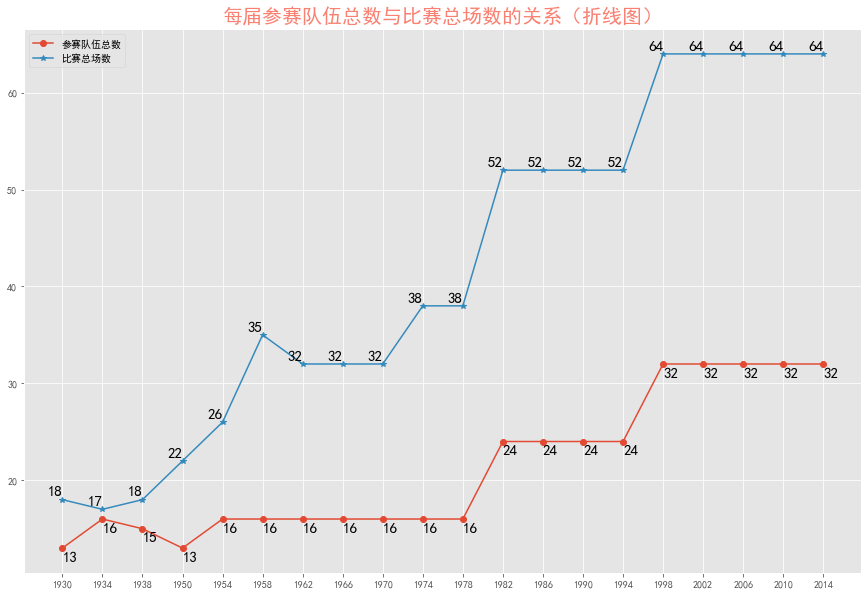

In [14]:
def tgames():
    fig, ax1 = plt.subplots(figsize=(15,10))
    x = np.arange(len(cups.Year))
    # 折线一,参赛队伍数
    y1 = cups.QualifiedTeams
    plt.plot(x,y1,marker="o",label='参赛队伍总数')
    plt.xticks(x,cups.Year,rotation=0)
    plt.legend(loc='upper left',fontsize=20)
    for a,b in zip(x,y1):
        plt.text(a,b-0.3,'%s'%b,ha='left',va='top',fontsize=15)

    # 折线二,比赛总场数    
    y2 = cups.MatchesPlayed
    plt.plot(x,y2,marker="*",label='比赛总场数')
    plt.legend(loc='upper left')
    for a,b in zip(x,y2):
        plt.text(a,b+0.2,'%s'%b,ha='right',va='bottom',fontsize=15)
    plt.title("每届参赛队伍总数与比赛总场数的关系（折线图）",fontsize=20,color='salmon')
tgames()

从上图我们可以发现:
- 一般地，参赛队伍数多，比赛的总场数也多，在第七届世界杯(1962)后，比赛总场数才基本符合这个趋势。这实际反映的是这项赛事慢慢走向成熟的标志之一，中后期赛制趋于稳定。
- 而早期的世界杯因赛制还没完善，变数较大，如：有的球队突然退赛、1934年第二届并没有小组赛、1950年没有决赛、1958年若同分的就复赛等，导致参赛队伍数与比赛场数没有什么相同的变化趋势。

### 接下来从matche表分析各球队的总进球数、总比赛场数，参加总次数（条形和散点图）

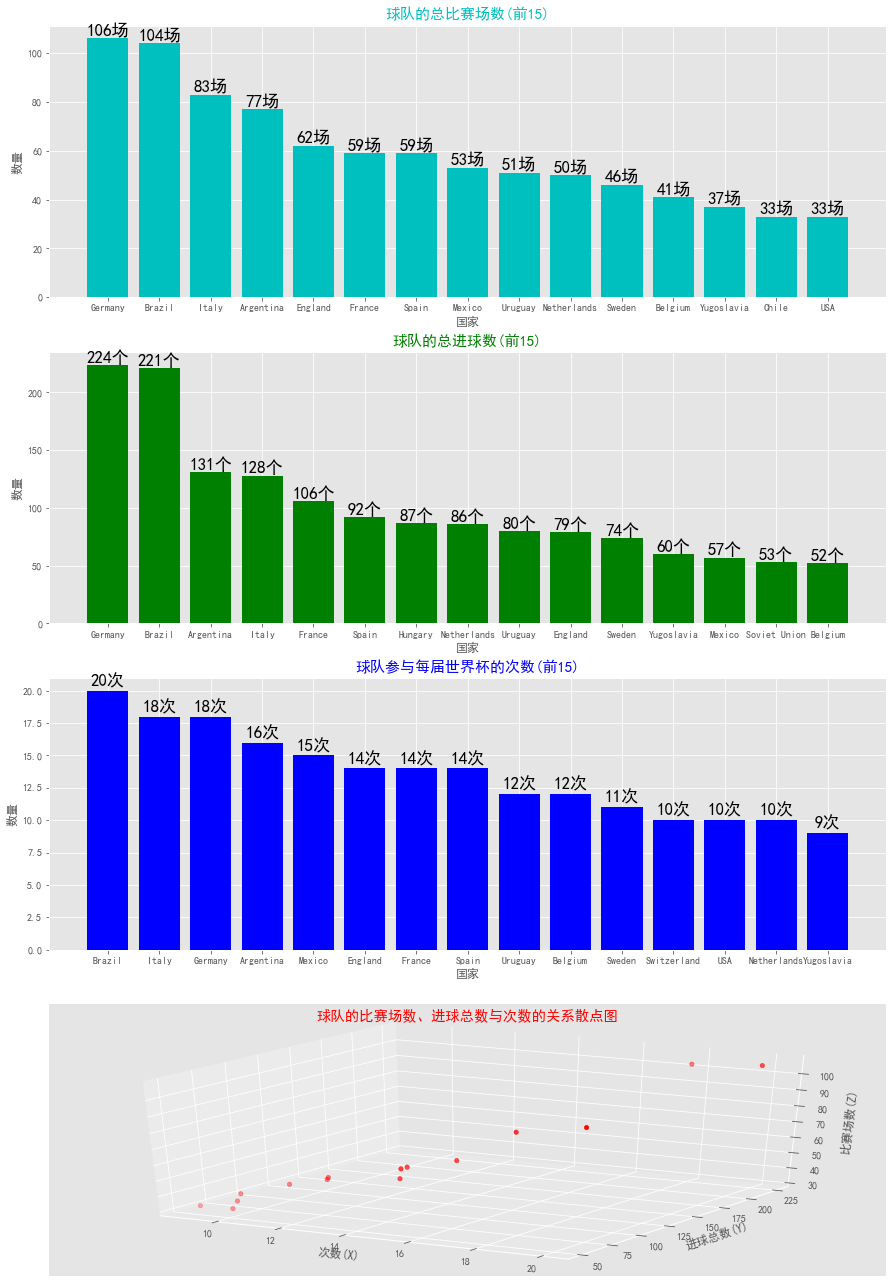

In [15]:
def bgames():
    # 同样地,先把联邦德国改名为德国
    matches["Away Team Name"] = matches["Away Team Name"].str.replace("Germany FR","Germany")
    matches["Home Team Name"] = matches["Home Team Name"].str.replace("Germany FR","Germany")
    # 统计各队进球数
    ht = matches["Home Team Name"].value_counts().reset_index()
    ht.columns = ["team","matches"]
    at = matches["Away Team Name"].value_counts().reset_index()
    at.columns = ["team","matches"]
    mt1 = pd.concat([ht,at],axis=0)
    # 字图一 :比赛场数最多的球队(前15)
    fig = plt.figure(figsize=(15,23))
    ax1 = plt.subplot(411) 

    x = mt1.groupby("team")["matches"].sum().reset_index().sort_values(by='matches',ascending=False)
    x2 = x[:15]
    x3,y = x2["team"],x2["matches"]
    ax1.bar(x3,y,color='c')
    ax1.set_title("球队的总比赛场数(前15)",fontsize=15,color='c')
    ax1.set_xlabel("国家")
    ax1.set_ylabel("数量")
    for a,b in zip(x3,y):
        ax1.text(a,b+0.2,'%.0f'%b+"场",ha = 'center',va = 'bottom',fontsize=17)

    # 字图二 :总进球数最多的球队(前15)
    ax2 = plt.subplot(412) 
    tt_gl_h = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
    tt_gl_h.columns = ["team","goals"]
    tt_gl_a = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
    tt_gl_a.columns = ["team","goals"]
    total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
    total_goals = total_goals.groupby("team")["goals"].sum().reset_index().sort_values(by="goals",ascending =False)
    total_goals2 = total_goals[:15]
    x,y = total_goals2["team"],total_goals2["goals"]
    ax2.bar(x,y,color='g')
    ax2.set_title("球队的总进球数(前15)",fontsize=15,color='g')
    ax2.set_xlabel("国家")
    ax2.set_ylabel("数量")
    for a,b in zip(x,y):
        ax2.text(a,b+0.2,'%.0f'%b+"个",ha = 'center',va = 'bottom',fontsize=17)

    # 字图三 :球队参与每届世界杯的次数(前15)
    ax3 = plt.subplot(413) 
    hy = matches[["Year","Home Team Name"]]
    hy.columns = ["year","team"]
    hy["type"] = "HOME TEAM"
    ay = matches[["Year","Away Team Name"]]
    ay.columns = ["year","team"]
    ay["type"] = "AWAY TEAM"
    home_away = pd.concat([hy,ay],axis=0)
    yt = home_away.groupby(["year","team"]).count().reset_index()
    yt = yt["team"].value_counts().reset_index()
    yt2 = yt[:15]
    x,y = yt2["index"],yt2["team"]
    ax3.bar(x,y,color='b')
    ax3.set_title("球队参与每届世界杯的次数(前15)",color='b',fontsize=15)
    ax3.set_xlabel("国家")
    ax3.set_ylabel("数量")
    for a,b in zip(x,y):
        ax3.text(a,b+0.2,'%.0f'%b+"次",ha = 'center',va = 'bottom',fontsize=17)

    #    
    ax4 = plt.subplot(414,projection='3d') 
    Z = x2["matches"]
    Y = total_goals2["goals"]
    X = yt2["team"]
    ax4.scatter(X, Y, Z,c='r')
    ax4.set_zlabel("比赛场数(Z)")
    ax4.set_ylabel("进球总数(Y)")
    ax4.set_xlabel("次数(X)")
    ax4.set_title("球队的比赛场数、进球总数与次数的关系散点图",color='r')
    return plt.show()
bgames()

从上四图可以得知:
- 巴西参与世界杯的次数是20次，即目前为止每一届的世界杯都有巴西的身影，从没缺席。意大利和德国随后都有18次，缺席2次。再到阿根廷的16次。
- 总的比赛场数最多的是德国,106场,其次是巴西104场。德国的总场数比巴西多，可能是因为其平局较多，早期的赛制里，涉及出线时，平局要重赛。意大利和阿根廷排在三四名，但与前两名的德国和巴西分值差距较大，约20场。
- 总的进球数排在前四名还是德国、巴西、意大利、阿根廷。同样的,前两名的进球数与三四名的差距较大,约相差90个进球。
- 从图的榜单看，前四名始终有：德国，巴西，意大利，阿根廷。由此可见，这四队世界杯的经验最丰富，综合实力最强。
- 从散点图可以获知，参与的次数，比赛总场数，进球总数这三者是正相关的。

### 从cups表分析每届世界杯的现场观众总人数（散点图）

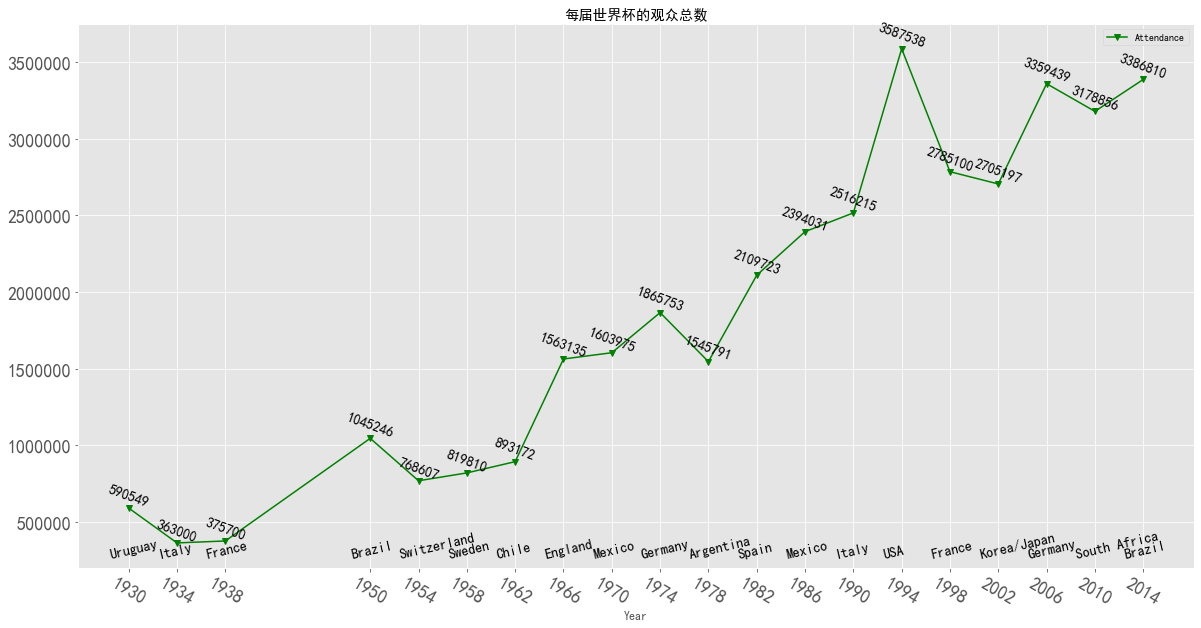

In [17]:
def sum_audience():
    cups.plot(y="Attendance",x="Year",grid=True,figsize=(20,10),title="每届世界杯的观众总数",marker="v",fontsize=18,color='g')
    plt.xticks(cups.Year,rotation=-30)
    # 数据标签
    for a,b in zip(cups["Year"],cups["Attendance"]):
        plt.text(a,b+0.5,'%.0f'%b,ha = 'center',va = 'bottom',rotation = -20,fontsize=14)
    for i in range(0,20):
        plt.annotate(cups["Country"][i], 
                 xy=(cups["Year"][i],199999), 
                 xytext=(-20,10), textcoords='offset points',
                 rotation=13,
                 fontsize=14)
sum_audience()

从散点图中我们可以得知:
- 总体上,观众人数是逐届上升的,体现的是这项运动的越来越受欢迎。
- 其中出现最大值3587538人次的是在1994届美国世界杯。原因是，美国经济、娱乐业发达，看得起比赛的人较多。

### 从matches表中,探究主队与客队的对战结果（饼图）

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, '全场主队和客队对战赛果饼图')

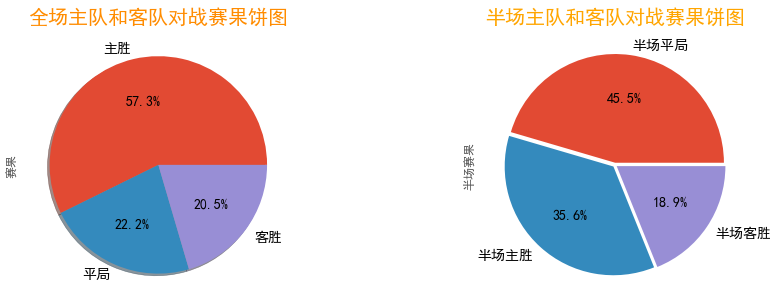

In [20]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
def label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return "主胜"
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return "客胜"
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "平局"    
matches["赛果"] = matches.apply(lambda matches:label(matches),axis=1)
matches["赛果"].value_counts().plot.pie(autopct="%1.1f%%",fontsize =14,shadow=True)
plt.title("全场主队和客队对战赛果饼图",color='darkorange',fontsize=20)

ax2 = plt.subplot2grid((1,2),(0,1))

def label2(matches):
    if matches["Half-time Home Goals"] > matches["Half-time Away Goals"]:
        return "半场主胜"
    if matches["Half-time Away Goals"] > matches["Half-time Home Goals"]:
        return "半场客胜"
    if matches["Half-time Home Goals"] == matches["Half-time Away Goals"]:
        return "半场平局"

def h_a_pk():
    matches["半场赛果"] = matches.apply(lambda matches:label2(matches),axis=1)
    matches["半场赛果"].value_counts().plot.pie(autopct="%1.1f%%",fontsize = 14,explode = [0.02,0.02,0.02])
    plt.title("半场主队和客队对战赛果饼图",color='orange',fontsize=20)
    return plt.show()
h_a_pk()

从饼图我们可以获知:
- 从全场看,主队战绩占优,胜率约有60%，主队不败的概率是79%。可能的原因:主队球迷到场数更多,士气加成大，球员更卖力。
- 从上半场对战赛果看平局居多，占45.5%，其次才是主胜，主队不败概率81.1%。原因：上半场对战双方战术都趋向于保守，大多数都是为下半场蓄力。同时，从侧面可知，下半场的进球数更多，比赛更精彩，下半场才是决定胜负的关键半场

### 历届主队和客队进球数对比(叠加条形图+小提琴图)

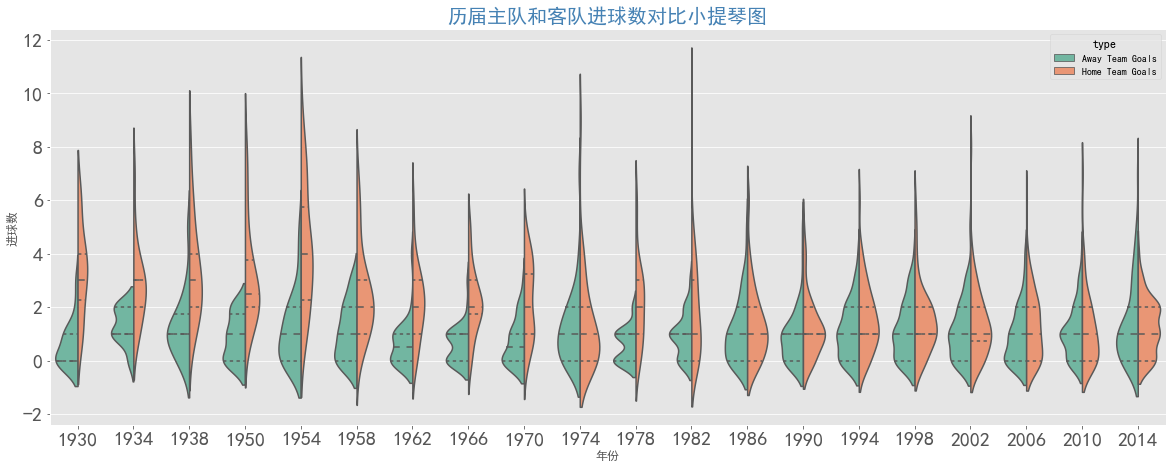

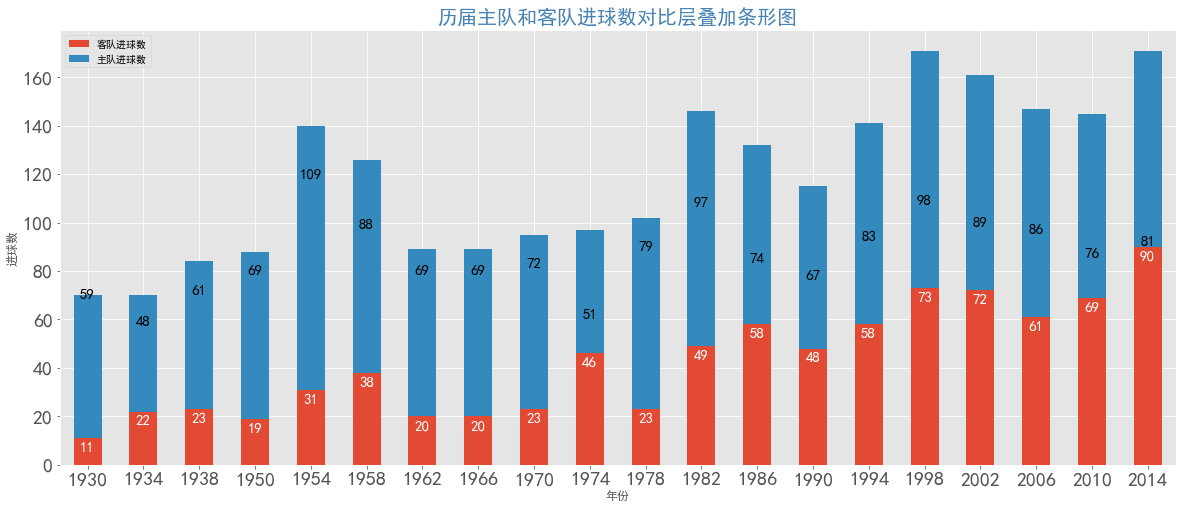

In [22]:
# 引入seaborn 库,绘制小提琴
import seaborn as sns

def h_a_balls():
    plt.figure(figsize=(20,16))
    ax1 = plt.subplot2grid((2,1),(0,0))
    # 绘制小提琴图
    gh = matches[["Year","Home Team Goals"]]
    gh.columns = ["年份","进球数"]
    gh["type"] = "Home Team Goals"
    ga = matches[["Year","Away Team Goals"]]
    ga.columns = ["年份","进球数"]
    ga["type"] = "Away Team Goals"
    gls = pd.concat([ga,gh],axis=0)
    sns.violinplot(gls["年份"],gls["进球数"],hue=gls["type"],split=True,inner="quart",palette="Set2")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("历届主队和客队进球数对比小提琴图",fontsize=20,c='steelblue')

    # 绘制层叠条形图
    H_A_goals = matches.groupby('Year')['Home Team Goals', 'Away Team Goals'].sum().reset_index().astype(int)
    x = range(0,20)
    H_A_goals[["Away Team Goals","Home Team Goals"]].plot.bar(stacked=True,figsize=(20,8))
    plt.title("历届主队和客队进球数对比层叠加条形图",fontsize=20,c='steelblue')
    for i,j in zip(x,H_A_goals["Away Team Goals"]):
        plt.text(i,j-6.5,"%.0f"%j,ha='center',va='bottom',fontsize=15,c='white')
    for i,j in zip(x,H_A_goals["Home Team Goals"]):
        plt.text(i,j+8.5,"%.0f"%j,ha='center',va='bottom',fontsize=15,c='black')
    plt.xticks(x,H_A_goals["Year"],fontsize=20,rotation=0)
    plt.yticks(fontsize=20)
    plt.legend(["客队进球数","主队进球数"],loc="upper left",fontsize=10)
    plt.xlabel("年份")
    plt.ylabel("进球数")
    return plt.show()
h_a_balls()

从上图,可以得知:
- 主队在早期的世界杯里进球数一直占据优势,后面与客队的差距逐渐拉小,甚至在2014届世界杯中被反超。
- 这实际反映的是在总比赛场次里面 ，总主客队对战赛果的差异逐渐变小。

## 数据模型建立，对2018年的世界杯冠军预测
- 基本思路： 运用sklearn库的逻辑回归算法（logisticsregression）进行预测
- - 逻辑回归，名字虽然含有回归，但实质是一种分类算法
- - 在本数据集，主要把数据分为胜、平、负三类，并分别用2,1,0代表

查看matches数据：

In [ ]:
matches.head()

对matches进行特征选取，在此我只选了年份，赛果，主/客队名，并对目标列（‘赛果’）进行编码，用数字替代字符串，因为算法只对数值型数据有效：

In [ ]:
data = matches[['Year','Home Team Name','Away Team Name','赛果']]
data.loc[data['赛果']=='主胜','赛果'] = 2
data.loc[data['赛果']=='客胜','赛果'] = 1
data.loc[data['赛果']=='平局','赛果'] = 0
data.tail()

matches数据表只包含往届的世界杯数据，2018届的数据没有，因此把2018世界杯的资料导进来，并把小组赛48场对决提取出来

In [ ]:
import pandas as pd
test_2018 = pd.read_csv('data/fifa-world-cup-2018.csv')
test_2018 = test_2018[['Home Team','Away Team']]
test_2018['Year'] = 2018
test_2018 = test_2018.iloc[:48,:]
test_2018['Home Team Name'] = test_2018['Home Team']
test_2018['Away Team Name'] = test_2018['Away Team']
test_2018.drop(labels="Away Team",axis=1,inplace=True)
test_2018.drop(labels="Home Team",axis=1,inplace=True)
test_2018.head()
# pd.get_dummies(test_2018).head()

把2018的数据合并到往届数据中，构建新表以构建模型：

In [ ]:
result_data = pd.concat([data,test_2018],axis=0,ignore_index=True)
result_data.head()

In [ ]:
# data.赛果.value_counts()

由于逻辑回归只对数字有效，因此对所有字段做one-hot（独热）编码处理。原字段为数字时，pandas的get_dummies不会对它产生影响：

In [ ]:
print("原特征:\n",list(result_data.columns),"\n")
data_dummies =pd.get_dummies(result_data)

list(data_dummies.columns)


In [ ]:
# data_dummies.head()
data_dummies.tail()

In [ ]:
data_dummies[data_dummies['Year'] == 2018].head()

In [ ]:
# data_dummies.columns[1]

对数据集划分训练集和测试集，以2018年为分届点，因为新导入的2018届数据没有目标列，即2018年的‘赛果’列为空。所以，2018届以前的划分为训练集，2018为测试集：

In [ ]:
X_train = data_dummies.values[:836,2:]
y_train = data_dummies.values[:836,1]
print("X.shape:{} y.shape:{}".format(X_train.shape,y_train.shape))
X_test = data_dummies.values[836:,2:]
print("X.shape:{}".format(X_test.shape))

#### 小组赛预测

构建的模型如下：

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train,y_train)
logreg.score(X_train,y_train)
prediction = logreg.predict(X_test)
prediction
len(prediction)

如上所示，测试集得分为66分，即预测小组赛的48场比赛准确率约为6.5成多。在开始时把主胜用2表示，客胜用1表示，0表示平局，用预测的prediction按顺序对照实际的赛果，可以得到<span class="girk">在小组赛的48场比赛中正确的预测场数为21场</span>。

#### 16强赛
- 小组赛预测完后，进入淘汰赛，进行顺序是16强，半准决赛，准决赛，决赛。三四名的排位赛不作预测
- 基本过程是：把48场小组赛预测的结果填进新表，然后用这个新表构建再次构建模型，预测出下一轮的队伍。

In [ ]:
result_data.tail()

把48场小组赛预测的结果填进新表后，其他步骤和预测小组赛一样：

In [ ]:
pre_fill = result_data.loc[result_data['赛果'].isnull()]
pre_fill.drop('赛果',inplace=True,axis=1)
pre_fill['赛果'] = prediction
pre_fill

In [ ]:
result_data2 = pd.concat([data,pre_fill],axis=0,ignore_index=True)
# result_data2[result_data2['Year'] == 2018]['Home Team Name'].value_counts()
result_data2

In [ ]:
# result_data2.isnull().sum()

In [ ]:
advance1 = pd.DataFrame({'Home Team Name':['France','Uruguay','Russia','Croatia','Brazil','Belgium','Sweden','Colombia'],'Away Team Name':['Argentina','Portugal','Spain','Denmark','Morocco','Japan','Switzerland','England'],'Year':2018})
# advance1
result_data22 = pd.concat([result_data2,advance1],axis=0,ignore_index=True)
result_data22

In [ ]:
print("原特征:\n",list(result_data22.columns),"\n")
data_dummies2 =pd.get_dummies(result_data22)

# list(data_dummies2.columns)
data_dummies2.head()

In [ ]:
X_train = data_dummies2.values[:884,2:]
y_train = data_dummies2.values[:884,1]
print("X.shape:{} y.shape:{}".format(X_train.shape,y_train.shape))
X_test = data_dummies2.values[884:,2:]
print("X.shape:{}".format(X_test.shape))
print()

from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression(solver="liblinear")
logreg2.fit(X_train,y_train)
logreg2.score(X_train,y_train)

adv_pred1 = logreg2.predict(X_test)
adv_pred1
len(adv_pred1)

如上所示，16强赛中，共八个场次，按顺序对照实际赛事场次共<span class="girk">中了5场</span>。

#### 半准决赛
- 步骤同预测16强一样，完善表数据，构建模型，预测：

In [ ]:
pre_fill2 = result_data22.tail(8)
pre_fill2.drop('赛果',axis=1,inplace=True)
pre_fill2['赛果'] = adv_pred1
pre_fill2

In [ ]:
result_data3 = pd.concat([result_data2,pre_fill2],axis=0,ignore_index=True)
result_data3.head()

In [ ]:
advance2 = pd.DataFrame({'Home Team Name':['Uruguay','Brazil','Sweden','Russia'],'Away Team Name':['France','Belgium','England','Croatia'],'Year':2018})
# advance1
result_data33 = pd.concat([result_data3,advance2],axis=0,ignore_index=True)
result_data33.head()

In [ ]:
print("原特征:\n",list(result_data33.columns),"\n")
data_dummies3 =pd.get_dummies(result_data33)

# list(data_dummies3.columns)
data_dummies3.head()

In [ ]:
X_train = data_dummies3.values[:892,2:]
y_train = data_dummies3.values[:892,1]
print("X_train.shape:{} y_train.shape:{}".format(X_train.shape,y_train.shape))
X_test = data_dummies3.values[892:,2:]
print("X_test.shape:{}".format(X_test.shape))
print()

from sklearn.linear_model import LogisticRegression
logreg3 = LogisticRegression(solver="liblinear")
logreg3.fit(X_train,y_train)
logreg3.score(X_train,y_train)

adv_pred2 = logreg3.predict(X_test)
adv_pred2
len(adv_pred2)

如上所示，训练集得分为68分，但实际预测结果全军覆没，<span class="burk">4场比赛中中0场！</span>

#### 准决赛
- 由于在半准决赛中，预测结果全军覆没。一个设想：为提高准确率，直接把实际结果填入到新表中，再进行预测，步骤如下：

In [ ]:
pre_fill3 = result_data33.tail(4)
pre_fill3.drop('赛果',axis=1,inplace=True)
pre_fill3['赛果'] = [1,1,1,0]
pre_fill3

In [ ]:
result_data4 = pd.concat([result_data3,pre_fill3],axis=0,ignore_index=True)
result_data4.head()

In [ ]:
advance3 = pd.DataFrame({'Home Team Name':['France','Croatia'],'Away Team Name':['Belgium','England'],'Year':2018})
advance3
result_data44 = pd.concat([result_data4,advance3],axis=0,ignore_index=True)
result_data44.head()


In [ ]:
print("原特征:\n",list(result_data44.columns),"\n")
data_dummies4 =pd.get_dummies(result_data44)

# list(data_dummies3.columns)
data_dummies4.head()

In [ ]:
X_train = data_dummies4.values[:896,2:]
y_train = data_dummies4.values[:896,1]
print("X_train.shape:{} y_train.shape:{}".format(X_train.shape,y_train.shape))
X_test = data_dummies4.values[896:,2:]
print("X_test.shape:{}".format(X_test.shape))
print()

from sklearn.linear_model import LogisticRegression
logreg4 = LogisticRegression(solver="liblinear")
logreg4.fit(X_train,y_train)
logreg4.score(X_train,y_train)

adv_pred3 = logreg4.predict(X_test)
adv_pred3


如上，两场比赛中，预测<span class="girk">中1场</span>

#### 决赛
- 步骤和准决赛一样：

In [ ]:
pre_fill4 = result_data44.tail(2)
pre_fill4.drop('赛果',axis=1,inplace=True)
pre_fill4['赛果'] = [2,0]
pre_fill4

In [ ]:
result_data5 = pd.concat([result_data4,pre_fill4],axis=0,ignore_index=True)
result_data5.head()

In [ ]:
advance4 = pd.DataFrame({'Home Team Name':['France'],'Away Team Name':['Croatia'],'Year':2018})
advance4
result_data55 = pd.concat([result_data5,advance4],axis=0,ignore_index=True)
result_data55.head()

In [ ]:
print("原特征:\n",list(result_data55.columns),"\n")
data_dummies5 =pd.get_dummies(result_data55)

# list(data_dummies3.columns)
data_dummies5.head()

In [ ]:
X_train = data_dummies5.values[:898,2:]
y_train = data_dummies5.values[:898,1]
print("X_train.shape:{} y_train.shape:{}".format(X_train.shape,y_train.shape))
X_test = data_dummies5.values[898:,2:]
print("X_test.shape:{}".format(X_test.shape))
print()

from sklearn.linear_model import LogisticRegression
logreg5 = LogisticRegression(solver="liblinear")
logreg5.fit(X_train,y_train)
logreg5.score(X_train,y_train)

adv_pred4 = logreg5.predict(X_test)
adv_pred4


预测结果为2，即主队获胜，即<span class="girk">法国是冠军</span>

## 总结
- 在此模型中，由于只选取了几个字段建立模型，实际上表里的绝大部分字段都能对实际结果产生影响，例如主客队进球数这些数值字段，还有一个palyers表没导进来进行分析，这个表对预测比赛结果也有影响，因为预测需要综合两队的实力进行考察，而队伍实力具体量的话，就是每个球员的实力。
- 而且此训练集得分很低，模型的训练明显的不够。
- 在预测过程中，在每个预测阶段都需要不断调整模型，这是一个比较繁琐的过程。
- 再者，逻辑回归是对数据缩放很敏感的算法，在数据预处理时并没有对数据进行标准化处理，这对模型预测的准确度也有很大的影响。